## -  Importing libraries and functions necessary for data preprocessing of part c)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from pandas.api.types import is_string_dtype, is_numeric_dtype
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2_contingency
from sklearn.metrics import accuracy_score, classification_report
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc

# YEAR - 2007

In [3]:
dataset_2007 = pd.read_csv (r"C:\Users\user\Desktop\progdata\data2007.csv")
#uploading the 2007 Dataset

In [4]:
pd.isnull(dataset_2007).sum(axis=0)
# Checking which columns have null values

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               160748
CRSDepTime                 0
ArrTime               177927
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                   22
ActualElapsedTime     177927
CRSElapsedTime           994
AirTime               177927
ArrDelay              177927
DepDelay              160748
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
CancellationCode     7292466
Diverted                   0
CarrierDelay               0
WeatherDelay               0
NASDelay                   0
SecurityDelay              0
LateAircraftDelay          0
dtype: int64

- Cancellation Code column has the highest number of null values. If we remove all these null values, a massive amount of data will be lost. Therefore, we will instead remove the column from the dataset so it dosent affect the calculations.
- The other columns with null values that dosent affect the following four attributes (the departure date, the scheduled departure and arrival times, the coordinates and distance between departure and planned arrival airports, and the carrier) are also removed.

In [5]:
dataset_2007.drop(columns=['CancellationCode','AirTime', 'ArrDelay' , 'ArrTime', 'TailNum'], inplace=True)

In [6]:
airports_dataset = pd.read_csv (r"C:\Users\user\Downloads\Programming\airports.csv")
#uploading airports dataset 

In [7]:
carriers_dataset = pd.read_csv (r"C:\Users\user\Downloads\Programming\carriers.csv")
#uploading carriers dataset

In [8]:
data_origin = pd.merge(dataset_2007, airports_dataset, left_on='Origin', right_on='iata', how='left', suffixes=('_origin', '_dest'))
#Merging the 'iata' column from the airports dataset with 'Origin' in the 2006 dataset

data_dest = pd.merge(data_origin, airports_dataset, left_on='Dest', right_on='iata', how='left', suffixes=('_origin', '_dest'))
#Merging the 'iata' column from the airports dataset with 'Dest' in the 2006 dataset

dataset_merged2007 = pd.merge(data_dest, carriers_dataset, left_on='UniqueCarrier', right_on='Code', how='left')
dataset_merged2007.rename(columns={'Code': 'UniqueCarrier_code'}, inplace=True)
# Merging 'UniqueCarrier' column with 'Code' from the carriers dataset

In [9]:
print(dataset_merged2007.columns)

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn',
       'TaxiOut', 'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'iata_origin',
       'airport_origin', 'city_origin', 'state_origin', 'country_origin',
       'lat_origin', 'long_origin', 'iata_dest', 'airport_dest', 'city_dest',
       'state_dest', 'country_dest', 'lat_dest', 'long_dest',
       'UniqueCarrier_code', 'Description'],
      dtype='object')


In [10]:
dataset_merged2007.drop(columns=['UniqueCarrier', 'Origin', 'Dest', 'Description'], inplace=True)

In [11]:
dataset_merged2007.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,lat_origin,long_origin,iata_dest,airport_dest,city_dest,state_dest,country_dest,lat_dest,long_dest,UniqueCarrier_code
0,2007,1,1,1,1232.0,1225,1340,2891,69.0,75.0,...,38.695422,-121.590767,ONT,Ontario International,Ontario,CA,USA,34.056000,-117.601194,WN
1,2007,1,1,1,1918.0,1905,2035,462,85.0,90.0,...,38.695422,-121.590767,PDX,Portland Intl,Portland,OR,USA,45.588722,-122.597500,WN
2,2007,1,1,1,2206.0,2130,2300,1229,88.0,90.0,...,38.695422,-121.590767,PDX,Portland Intl,Portland,OR,USA,45.588722,-122.597500,WN
3,2007,1,1,1,1230.0,1200,1330,1355,86.0,90.0,...,38.695422,-121.590767,PDX,Portland Intl,Portland,OR,USA,45.588722,-122.597500,WN
4,2007,1,1,1,831.0,830,1000,2278,86.0,90.0,...,38.695422,-121.590767,PDX,Portland Intl,Portland,OR,USA,45.588722,-122.597500,WN


In [12]:
pd.isnull(dataset_merged2007).sum(axis=0)

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               160748
CRSDepTime                 0
CRSArrTime                 0
FlightNum                  0
ActualElapsedTime     177927
CRSElapsedTime           994
DepDelay              160748
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
Diverted                   0
CarrierDelay               0
WeatherDelay               0
NASDelay                   0
SecurityDelay              0
LateAircraftDelay          0
iata_origin                0
airport_origin             0
city_origin             5473
state_origin            5473
country_origin             0
lat_origin                 0
long_origin                0
iata_dest                  0
airport_dest               0
city_dest               5476
state_dest              5476
country_dest               0
lat_dest                   0
long_dest     

In [13]:
diverted_count = dataset_merged2007['Diverted'].value_counts()
#checking the class distribution of diverted

print(diverted_count)

Diverted
0    7436036
1      17179
Name: count, dtype: int64


In [14]:
dataset_merged2007.drop(columns=['city_origin','state_origin', 'city_dest','ActualElapsedTime' ], inplace=True)
num_columns = dataset_merged2007.shape[1]
print("Number of columns:", num_columns)

Number of columns: 32


In [15]:
dataset_merged2007 = dataset_merged2007.dropna()
#dropping null values

In [16]:
pd.isnull(dataset_merged2007).sum(axis=0)

Year                  0
Month                 0
DayofMonth            0
DayOfWeek             0
DepTime               0
CRSDepTime            0
CRSArrTime            0
FlightNum             0
CRSElapsedTime        0
DepDelay              0
Distance              0
TaxiIn                0
TaxiOut               0
Cancelled             0
Diverted              0
CarrierDelay          0
WeatherDelay          0
NASDelay              0
SecurityDelay         0
LateAircraftDelay     0
iata_origin           0
airport_origin        0
country_origin        0
lat_origin            0
long_origin           0
iata_dest             0
airport_dest          0
state_dest            0
country_dest          0
lat_dest              0
long_dest             0
UniqueCarrier_code    0
dtype: int64

In [17]:
divert_count_ = dataset_merged2007['Diverted'].value_counts()
#checking the class distribution of diverted after removing the null values

print(divert_count_)

Diverted
0    7270018
1      16430
Name: count, dtype: int64


In [18]:
# Check for duplicate rows in the DataFrame
dupli_rows = dataset_merged2007.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = dupli_rows.sum()

if num_duplicate_rows > 0:
    print("There are", num_duplicate_rows, "duplicate rows in the dataset.")
else:
    print("There are no duplicate rows in the dataset.")

There are 27 duplicate rows in the dataset.


In [19]:
dataset_merged2007 = dataset_merged2007.drop_duplicates()

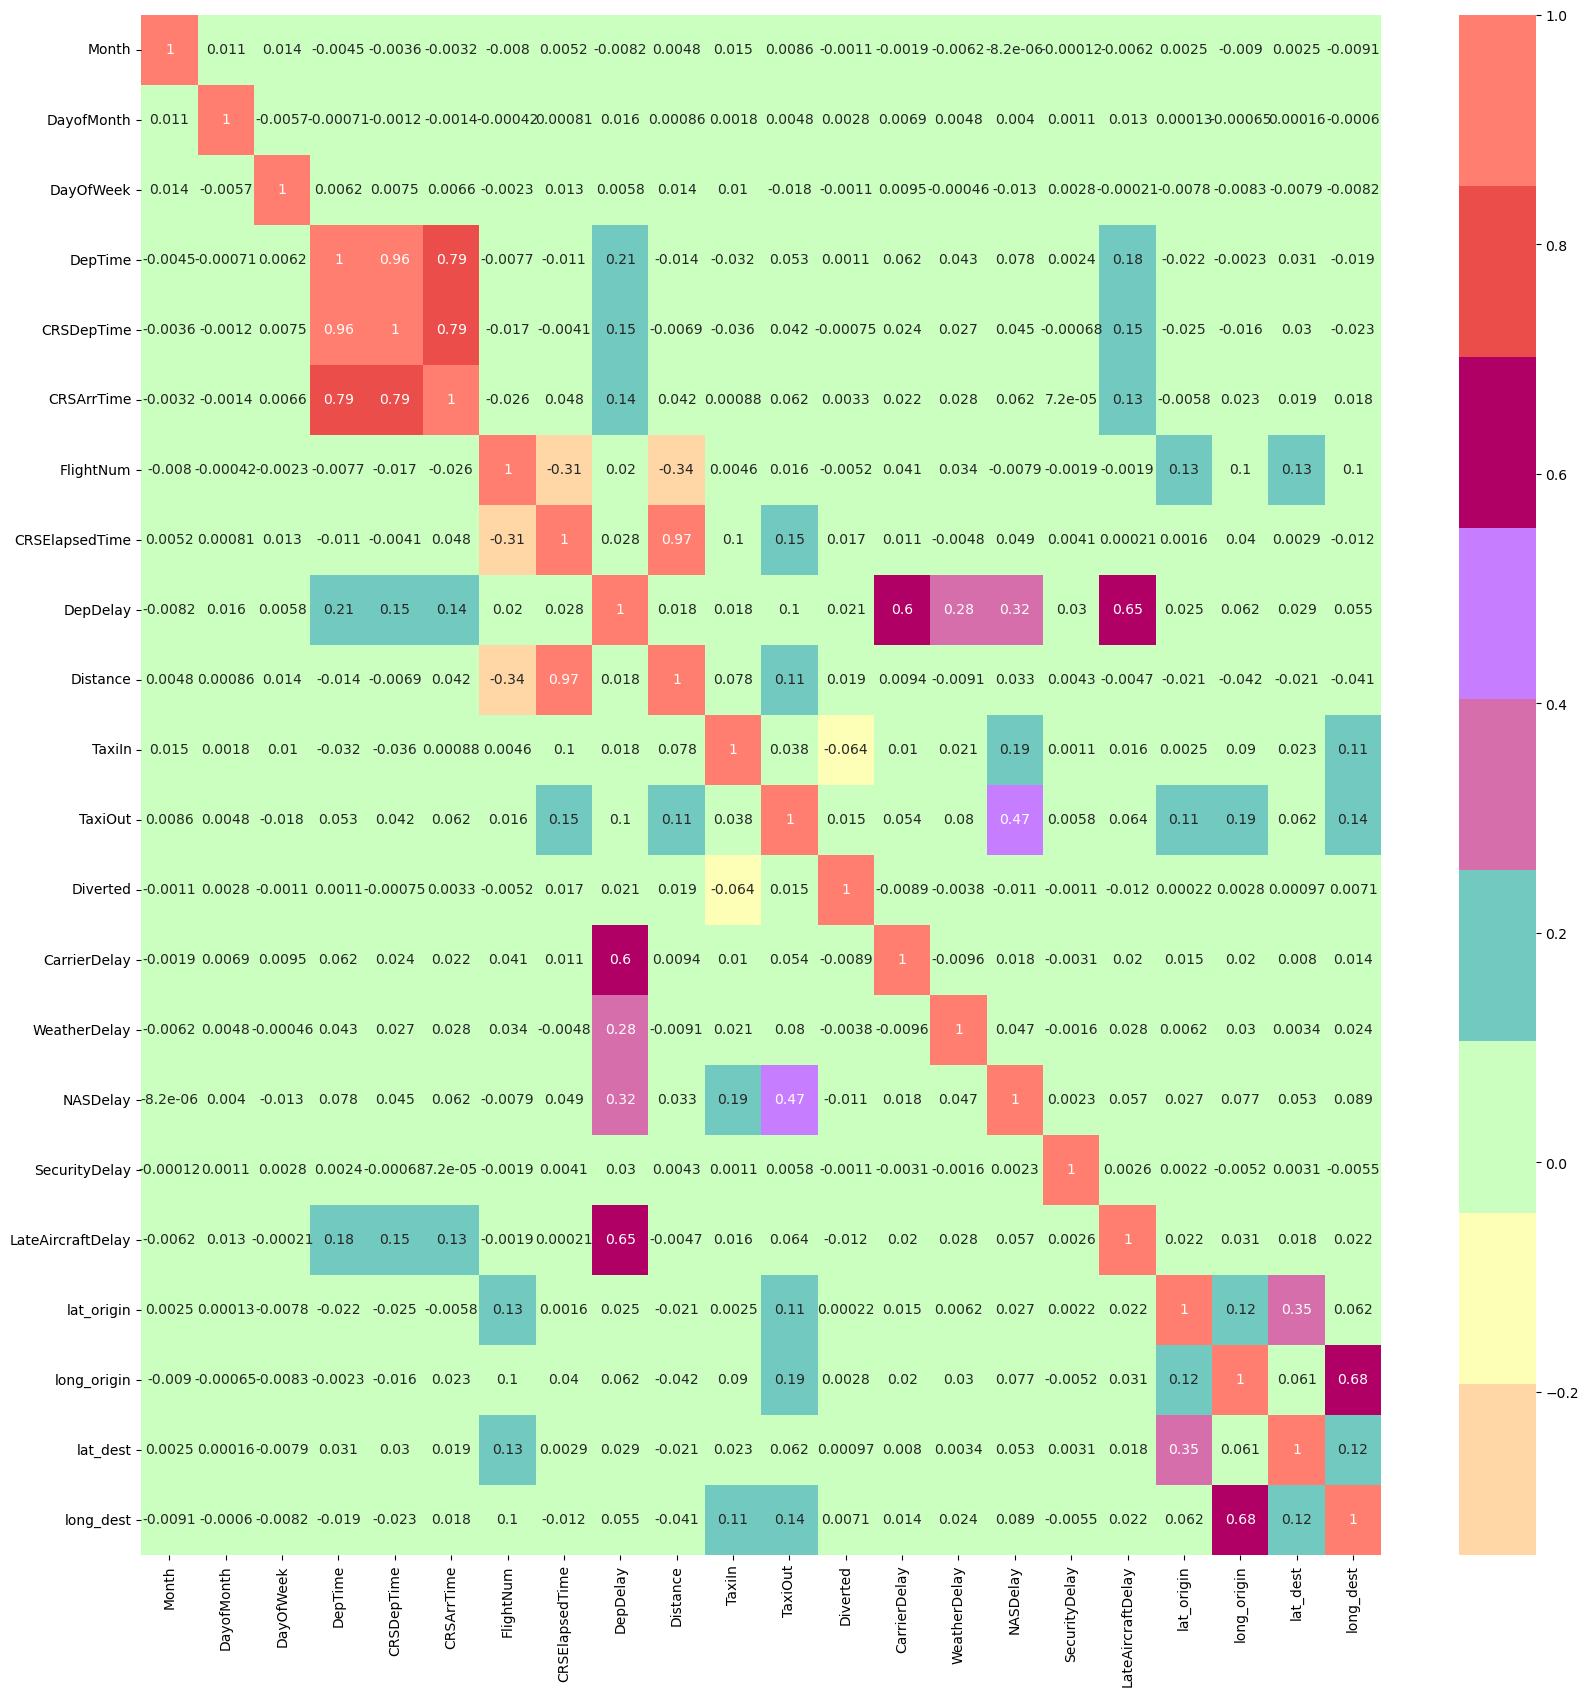

In [20]:
q2c_num1 = dataset_merged2007.drop(columns=['Year', 'Cancelled'])
# Select only numerical columns
numerical_cols = q2c_num1.select_dtypes(include=['int64', 'float64'])

# Set the figure size
plt.figure(figsize=(20, 20))

# Calculate the correlation matrix
correlation = numerical_cols.corr()

# Generate custom Color Palette
custom_palette = sns.color_palette(['#ff7e6f','#eb4e4a','#b10065' ,'#c77dff','#d66eab','#72c9bf','#caffbf','#fdffb6','#ffd6a5'])[::-1]

# Plot the heatmap
sns.heatmap(correlation, cmap=custom_palette, annot=True)

# Show the plot
plt.show()

# Feature Selection¶

In [21]:
#Importing selectkbest
from sklearn.feature_selection import SelectKBest

In [22]:
num_columns = dataset_merged2007.select_dtypes(include=['int64', 'float64'])
#Defining the features and labels
features = num_columns.drop(['Diverted'], axis=1)
labels = num_columns ['Diverted']

In [23]:
#Fitting selectkbest
sel = SelectKBest(k=3)
sel.fit(features, labels)
fe = sel.transform(features)

C:\Users\user\New folder\New folder\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 0 13] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\user\New folder\New folder\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [24]:
#Creating a variable 'selectx' containing the column names of 'dataset'
selectx= num_columns.columns

In [25]:
#Dropping 'Outcome' from 'selectx'
selectx=selectx.drop(['Diverted'])

In [26]:
#Creating a dataframe 'df' with selection scores for each feature
df = pd.DataFrame({"Columns": selectx,"Selection Score": sel.scores_})

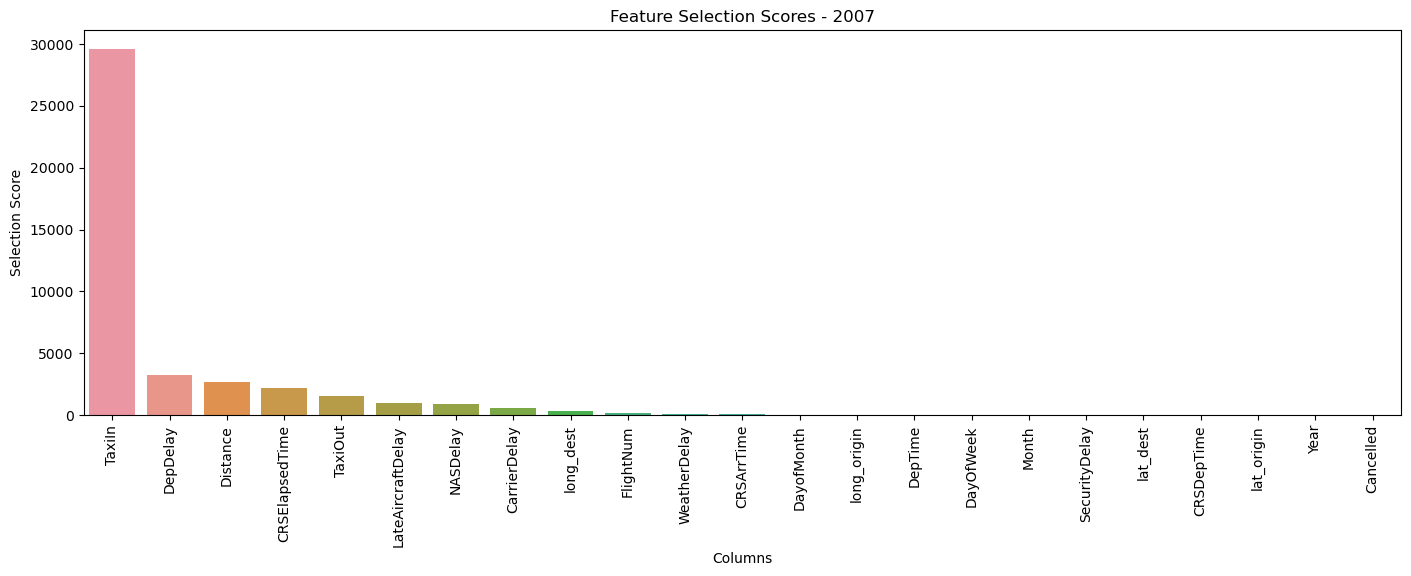

In [27]:
#Plotting a barplot to visualise the selecion score for each feature
plt.figure(figsize=(17,5))
sns.barplot(x='Columns',y="Selection Score", data=df,order=df.sort_values('Selection Score', ascending=False).Columns)
plt.xticks(rotation=90) 
plt.title('Feature Selection Scores - 2007')
plt.show()

# Modelling

In [28]:
categorical_a = dataset_merged2007['country_origin'].nunique()
categorical_b = dataset_merged2007['country_dest'].nunique()
categorical_c = dataset_merged2007['state_dest'].nunique()
categorical_d = dataset_merged2007['iata_origin'].nunique()
categorical_e = dataset_merged2007['iata_dest'].nunique()
categorical_f = dataset_merged2007['UniqueCarrier_code'].nunique()

print("Number of unique values in 'country_origin'- 06:", categorical_a)
print("Number of unique values in 'country_dest' - 06:", categorical_b)
print("Number of unique values in 'state_dest'- 06:", categorical_c)
print("Number of unique values in 'iata_origin'- 06:", categorical_d)
print("Number of unique values in 'iata_dest'- 06:", categorical_e)
print("Number of unique values in 'UniqueCarrier_code' - 06:", categorical_f)

Number of unique values in 'country_origin'- 06: 1
Number of unique values in 'country_dest' - 06: 1
Number of unique values in 'state_dest'- 06: 52
Number of unique values in 'iata_origin'- 06: 304
Number of unique values in 'iata_dest'- 06: 306
Number of unique values in 'UniqueCarrier_code' - 06: 20


In [29]:
#Dropping Security Delay because of the very low selction score and it doesnt directly affect any attributes
dataset_merged2007.drop(columns=['Cancelled', 'TaxiIn'], inplace=True)
dataset_merged2007.drop(columns=['airport_origin', 'airport_dest' ], inplace=True)

In [30]:
categorical_columns = dataset_merged2007.select_dtypes(include=['object'])
# Stating only the names of the categorical columns
print(categorical_columns.columns.tolist())

['iata_origin', 'country_origin', 'iata_dest', 'state_dest', 'country_dest', 'UniqueCarrier_code']


In [31]:
from sklearn.preprocessing import LabelEncoder
cat_cols = ['iata_dest' ,'iata_origin','country_origin', 'state_dest', 'country_dest', 'UniqueCarrier_code']
label_encoder = LabelEncoder()
for col in cat_cols:
    dataset_merged2007[col] = label_encoder.fit_transform(dataset_merged2007[col])

In [32]:
q2c_dataset=dataset_merged2007.drop(columns=["Diverted"])
#Dropping Diverted to predict it
q2c_dataset.shape

(7286421, 27)

In [33]:
y= dataset_merged2007['Diverted']

In [34]:
#splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(q2c_dataset, y, test_size=0.3, random_state=0)

In [35]:
#Viewing the shape of x_train and x_test
X_train.shape, X_test.shape

((5100494, 27), (2185927, 27))

In [36]:
#Checking whether the 'diverted' column has balanced data in terms of number of 0s and 1s, in the train set
y_train.value_counts()

Diverted
0    5088955
1      11539
Name: count, dtype: int64

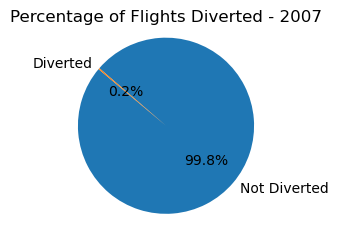

In [37]:
#visualising the imabalance using a pie chart
diverted_counts = [5088955, 11539]
labels = ['Not Diverted', 'Diverted']

# Plot
plt.figure(figsize=(2.5, 2.5))
plt.pie(diverted_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Flights Diverted - 2007')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [38]:
#Combining x_train and y_train to make the train set
train_set=pd.concat([X_train,y_train],axis=1)

In [39]:
# Separate majority and minority classes
dataset_majority = train_set[train_set.Diverted==0]
dataset_minority = train_set[train_set.Diverted==1]

In [40]:
desired_count_majority = 180000  
dataset_majority_downsampled = resample(dataset_majority,
                                        replace=False, 
                                        n_samples=desired_count_majority,  
                                        random_state=42)  
# Undersampling the majority class to get the desired class count and balance the dataset 

In [41]:
desired_count_minority = 162000  
dataset_minority_oversampled = resample(dataset_minority,
                                        replace=True,  
                                        n_samples=desired_count_minority, 
                                        random_state=42) 
# Oversampling the Diverted minority class to get the desired class count and balance the dataset 

In [42]:
balanced_train_set07 = pd.concat([dataset_majority_downsampled, dataset_minority_oversampled])
# Combing the oversampled minority class 1 with the downsampled majority class 0

In [43]:
balanced_train_set07 = balanced_train_set07.sample(frac=1, random_state=42).reset_index(drop=True)

In [44]:
# Display new class count in the training set
balanced_train_set07.Diverted.value_counts()

Diverted
0    180000
1    162000
Name: count, dtype: int64

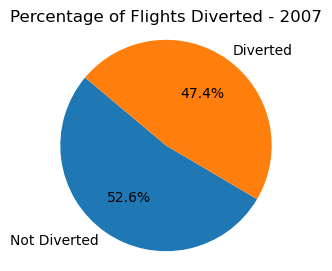

In [45]:
diverted_counts = [180000, 162000]
labels = ['Not Diverted', 'Diverted']

# Plot
plt.figure(figsize=(3, 3))
plt.pie(diverted_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Flights Diverted - 2007')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [46]:
#Making the new x_train and y_train 
X_train=balanced_train_set07.drop(['Diverted'],axis=1)
y_train=balanced_train_set07['Diverted']

In [47]:
#Scaling the x_train and x_test using standard scaling
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train = std_scaler.transform(X_train)
X_test = std_scaler.transform(X_test)

In [48]:
logisticregressionmodel = LogisticRegression(random_state = 16)
logisticregressionmodel.fit(X_train, y_train)

LogisticRegression(random_state=16)

In [49]:
y_predlr = logisticregressionmodel.predict(X_test)

In [50]:
cmlr = metrics.confusion_matrix(y_test, y_predlr)
#creating the confusion matrix
cmlr

array([[1755969,  425067],
       [   1710,    3181]], dtype=int64)

In [51]:
accuracylr= (cmlr[0,0] + cmlr[1,1]) / sum(sum(cmlr))
# Calculating the accuracy
accuracy_percentlr = accuracylr * 100
# Converting the value to a percentage
print("Accuracy - 2007: {:.2f}%".format(accuracy_percentlr))

Accuracy - 2007: 80.48%


In [52]:
threshold_value = 0.5
y_predlr_binary = (y_predlr > threshold_value).astype(int)
f1_scorelr = f1_score(y_test, y_predlr_binary)
# Calculating the F1 score
print("F1 score - 2007: ", f1_scorelr)

F1 score - 2007:  0.014688125520906684


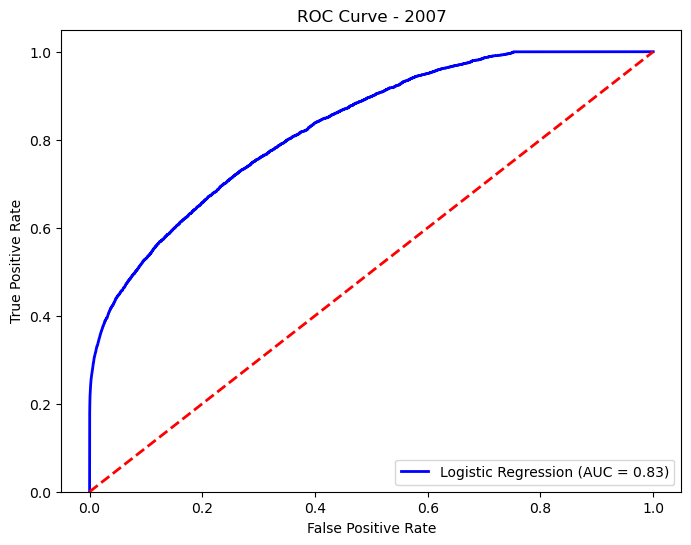

In [53]:
y_proba_lr = logisticregressionmodel.predict_proba(X_test)[:, 1]
# Get predicted probabilities for the positive class

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_proba_lr)
# Calculating the false positive rate, true positive rate, and thresholds

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_proba_lr)
# Calculating the false positive rate, true positive rate, and thresholds

roc_auc_lr = auc(fpr_lr, tpr_lr)
# Calculating the area under the curve (AUC)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - 2007')
plt.legend(loc="lower right")
plt.show()
# Plotting ROC curve

In [54]:
classification_report_lr = classification_report(y_test, y_predlr_binary)
print("Classification Report - 2007:\n", classification_report_lr)

Classification Report - 2007:
               precision    recall  f1-score   support

           0       1.00      0.81      0.89   2181036
           1       0.01      0.65      0.01      4891

    accuracy                           0.80   2185927
   macro avg       0.50      0.73      0.45   2185927
weighted avg       1.00      0.80      0.89   2185927



In [55]:
# Get the coefficients and intercept
coefficients = logisticregressionmodel.coef_[0]
intercept = logisticregressionmodel.intercept_[0]

# Feature names
feature_names = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
                 'CRSArrTime', 'FlightNum', 'CRSElapsedTime', 'DepDelay', 'Distance',
                 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
                 'LateAircraftDelay', 'iata_origin', 'country_origin', 'lat_origin',
                 'long_origin', 'iata_dest', 'state_dest', 'country_dest', 'lat_dest',
                 'long_dest', 'UniqueCarrier_code']

# Create a coefficient table
coefficient_table = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Add the intercept to the coefficient table
coefficient_table.loc[len(coefficient_table)] = ['Intercept', intercept]

# Print the coefficient table
print(coefficient_table)

               Feature  Coefficient
0                 Year     0.000000
1                Month    -0.019559
2           DayofMonth     0.041216
3            DayOfWeek    -0.013648
4              DepTime    -0.059438
5           CRSDepTime    -0.072708
6           CRSArrTime     0.086360
7            FlightNum     0.070560
8       CRSElapsedTime    -0.427918
9             DepDelay     3.166480
10            Distance     0.837022
11             TaxiOut     0.626531
12        CarrierDelay    -6.524980
13        WeatherDelay    -2.529178
14            NASDelay    -5.533012
15       SecurityDelay    -0.463245
16   LateAircraftDelay    -6.502053
17         iata_origin    -0.024787
18      country_origin     0.000000
19          lat_origin     0.007066
20         long_origin     0.013576
21           iata_dest    -0.123676
22          state_dest     0.235429
23        country_dest     0.000000
24            lat_dest    -0.035975
25           long_dest     0.086134
26  UniqueCarrier_code     0

In [56]:
coefficient_table.to_csv(r"C:\Users\user\Downloads\Programming\Akithmi Final Python Files\coefficients_table_NEW_2007.csv",index=False)